# test_12
This test circuit is a 7th order low pass filter, Chebyshev response, 0.1 dB of ripple from [1]. 

<img src="test_12.png" width="600">  

The netlist generated by LTSpice:
~~~
* test_12_v1.asc
C3 2 0 3.7642
I1 0 1 AC 1
C5 3 0 4.015
C7 4 0 3.0182 Rser=0
L2 1 2 0.7529 Rser=0
L4 2 3 0.9276 Rser=0
L6 3 4 0.9142 Rser=0
Rs 1 0 0.5
Rl 4 0 1
C1 1 0 1.5948
;op
.ac list 0.159154943091895
* ;.ac dec 100 0.01 1
.backanno
.end

~~~

The netlist generated by LTSpice was modified to remove Rser=0 from inductor lines and 'AC 1' from I1. This is the modified net list:
~~~
* test_12_v1.asc
C3 2 0 3.7642
I1 0 1 1
C5 3 0 4.015
C7 4 0 3.0182 
L2 1 2 0.7529 
L4 2 3 0.9276 
L6 3 4 0.9142
Rs 1 0 0.5
Rl 4 0 1
C1 1 0 1.5948
;op
* ;.ac list 0.159154943091895
.ac dec 100 0.01 1
.backanno
.end
~~~

This netlist is read into the Symbolic Modified Nodal Analysis Jupyter notebook and the following circuit equations were generated.  
~~~
          ⎛       1 ⎞     
I_L2 + v₁⋅⎜C₁⋅s + ──⎟ = I₁
          ⎝       Rs⎠     
C₃⋅s⋅v₂ - I_L2 + I_L4 = 0
C₅⋅s⋅v₃ - I_L4 + I_L6 = 0
           ⎛       1 ⎞    
-I_L6 + v₄⋅⎜C₇⋅s + ──⎟ = 0
           ⎝       Rl⎠    
-I_L2⋅L₂⋅s + v₁ - v₂ = 0
-I_L4⋅L₄⋅s + v₂ - v₃ = 0
-I_L6⋅L₆⋅s + v₃ - v₄ = 0
~~~

Reference:  
[1] Anatol I. Zverev, Handbook of Filter Synthesis, John Wiley & Sons, 1967

In [1]:
import os
from sympy import *
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
init_printing()

In [2]:
from sympy.physics.control.lti import TransferFunction, Series
from sympy.physics.control.control_plots import pole_zero_plot, bode_plot

Copy the text strings generated by the Symbolic Modified Nodal Analysis Jupyter notebook to the cell below.

In [3]:
v3, L2, I_L2, C1, C3, I1, L4, I_L4, v2, Rs, C5, v4, v1, L6, Rl, I_L6, C7, s = symbols(' v3  L2  I_L2  C1  C3  I1  L4  I_L4  v2  Rs  C5  v4  v1  L6  Rl  I_L6  C7  s ')
A = Matrix([[C1*s + 1/Rs, 0, 0, 0, 1, 0, 0], [0, C3*s, 0, 0, -1, 1, 0], [0, 0, C5*s, 0, 0, -1, 1], [0, 0, 0, C7*s + 1/Rl, 0, 0, -1], [1, -1, 0, 0, -L2*s, 0, 0], [0, 1, -1, 0, 0, -L4*s, 0], [0, 0, 1, -1, 0, 0, -L6*s]])
X = Matrix( [v1, v2, v3, v4, I_L2, I_L4, I_L6] )
Z = Matrix( [I1, 0, 0, 0, 0, 0, 0] )

equ = Eq(A*X,Z)
equ

⎡          ⎛       1 ⎞ ⎤       
⎢I_L2 + v₁⋅⎜C₁⋅s + ──⎟ ⎥       
⎢          ⎝       Rs⎠ ⎥   ⎡I₁⎤
⎢                      ⎥   ⎢  ⎥
⎢C₃⋅s⋅v₂ - I_L2 + I_L4 ⎥   ⎢0 ⎥
⎢                      ⎥   ⎢  ⎥
⎢C₅⋅s⋅v₃ - I_L4 + I_L6 ⎥   ⎢0 ⎥
⎢                      ⎥   ⎢  ⎥
⎢           ⎛       1 ⎞⎥ = ⎢0 ⎥
⎢-I_L6 + v₄⋅⎜C₇⋅s + ──⎟⎥   ⎢  ⎥
⎢           ⎝       Rl⎠⎥   ⎢0 ⎥
⎢                      ⎥   ⎢  ⎥
⎢ -I_L2⋅L₂⋅s + v₁ - v₂ ⎥   ⎢0 ⎥
⎢                      ⎥   ⎢  ⎥
⎢ -I_L4⋅L₄⋅s + v₂ - v₃ ⎥   ⎣0 ⎦
⎢                      ⎥       
⎣ -I_L6⋅L₆⋅s + v₃ - v₄ ⎦       

## Symbolic solution
Symbolic equations are too long to display in a useful and meaningful way.

In [4]:
symbolic_solution = solve(equ,X)
#symbolic_solution

The transfer function H(s)=V4(s)/I1

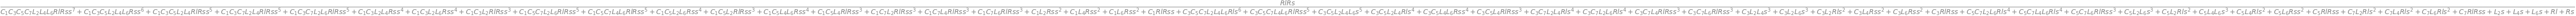

In [5]:
# display the transfer function
H = symbolic_solution[v4]/I1
H

Get the numerator and denominator of the transfer function.

In [6]:
num, denom = fraction(H) #returns numerator and denominator

In [7]:
num

In [8]:
denom

In [9]:
collect((denom).expand(),s)

In [10]:
solve(denom,s) #computes the symbolic roots of a univariate polynomial; will fail for most high-degree polynomials (five or greater)

As indicated by the comment above, the degree was too high for SymPy to extract the roots in symbolic form.

## Numeric solution

In [11]:
# put the component values into dictionary format
component_values = {
    C3:3.7642e+00,
    I1:1.0000e+00,
    C5:4.0150e+00,
    C7:3.0182e+00,
    L2:7.5290e-01,
    L4:9.2760e-01,
    L6:9.1420e-01,
    Rs:5.0000e-01,
    Rl:1.0000e+00,
    C1:1.5948e+00}

In [12]:
component_values

In [13]:
equ1a = equ.subs(component_values)
equ1a

⎡I_L2 + v₁⋅(1.5948⋅s + 2.0) ⎤   ⎡1.0⎤
⎢                           ⎥   ⎢   ⎥
⎢-I_L2 + I_L4 + 3.7642⋅s⋅v₂ ⎥   ⎢ 0 ⎥
⎢                           ⎥   ⎢   ⎥
⎢ -I_L4 + I_L6 + 4.015⋅s⋅v₃ ⎥   ⎢ 0 ⎥
⎢                           ⎥   ⎢   ⎥
⎢-I_L6 + v₄⋅(3.0182⋅s + 1.0)⎥ = ⎢ 0 ⎥
⎢                           ⎥   ⎢   ⎥
⎢ -0.7529⋅I_L2⋅s + v₁ - v₂  ⎥   ⎢ 0 ⎥
⎢                           ⎥   ⎢   ⎥
⎢ -0.9276⋅I_L4⋅s + v₂ - v₃  ⎥   ⎢ 0 ⎥
⎢                           ⎥   ⎢   ⎥
⎣ -0.9142⋅I_L6⋅s + v₃ - v₄  ⎦   ⎣ 0 ⎦

The equations above are using the component values and the Laplace variable.

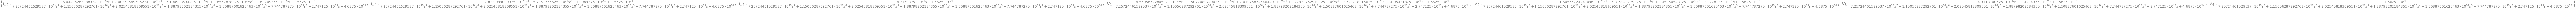

In [14]:
# solve the equations.
u1 = solve(equ1a,X)
u1 # the solution is too long to display correctly

The transfer function H(s)=V4(s)/I1

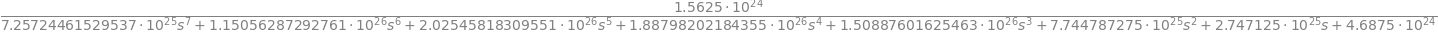

In [15]:
TF = u1[v4]/component_values[I1]
TF

The large exponents can be removed by dividing throught by the numberator. First extract the numerator and denominator.

In [34]:
num, denom = fraction(TF) #returns numerator and denominator

In [35]:
num

In [36]:
denom

Divide both numerator and denominator by the numerator.

In [19]:
denom = denom/num
denom

In [20]:
num = num/num
num

In [21]:
Poly(denom, s).all_coeffs()

In [22]:
solve(denom,s)

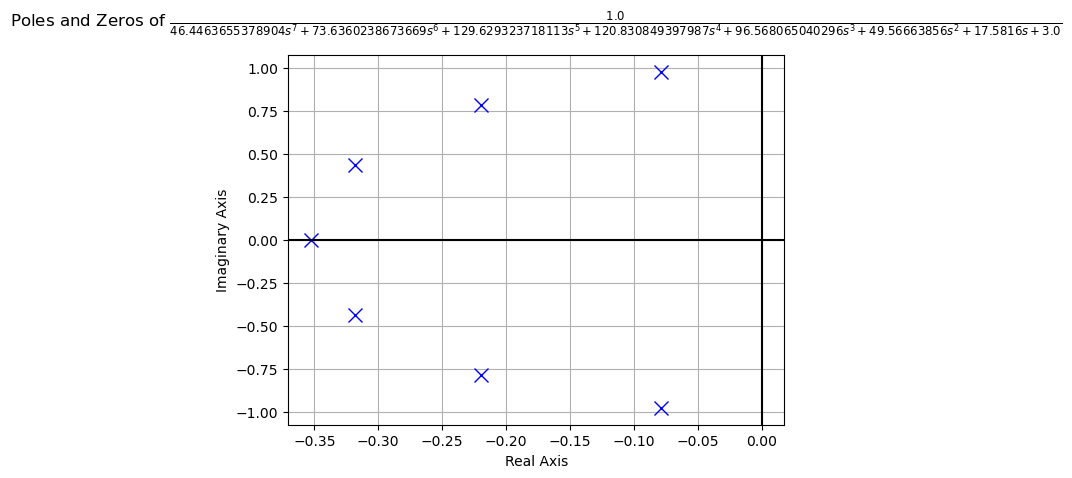

In [23]:
## plot poles and zeros
tf2 = TransferFunction(num, denom, s)

#pole_zero_plot(tf1,show=False)
pole_zero_plot(tf2,show=True)

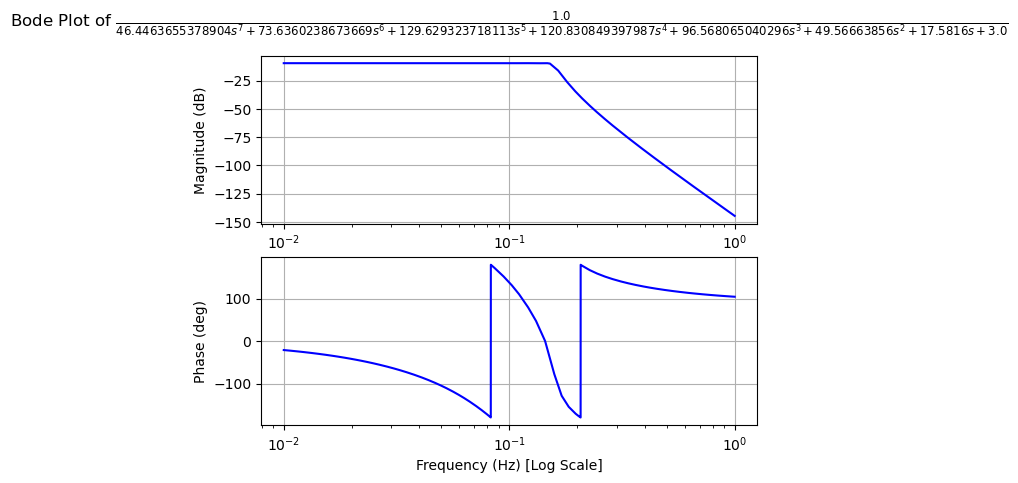

In [24]:
bode_plot(tf2,initial_exp=-2, final_exp=0,freq_unit='Hz', phase_unit='deg')  

As shown above, SymPy can easily plot the poles and zeros as well as the Bode function.

## AC analysis
Solve equations for $\omega$ equal to 1 radian per second, s = 1j.

In [37]:
equ1a_1rad_per_s = equ1a.subs({s:1j})
equ1a_1rad_per_s  # display the equations

⎡I_L2 + v₁⋅(2.0 + 1.5948⋅ⅈ) ⎤   ⎡1.0⎤
⎢                           ⎥   ⎢   ⎥
⎢-I_L2 + I_L4 + 3.7642⋅ⅈ⋅v₂ ⎥   ⎢ 0 ⎥
⎢                           ⎥   ⎢   ⎥
⎢ -I_L4 + I_L6 + 4.015⋅ⅈ⋅v₃ ⎥   ⎢ 0 ⎥
⎢                           ⎥   ⎢   ⎥
⎢-I_L6 + v₄⋅(1.0 + 3.0182⋅ⅈ)⎥ = ⎢ 0 ⎥
⎢                           ⎥   ⎢   ⎥
⎢ -0.7529⋅ⅈ⋅I_L2 + v₁ - v₂  ⎥   ⎢ 0 ⎥
⎢                           ⎥   ⎢   ⎥
⎢ -0.9276⋅ⅈ⋅I_L4 + v₂ - v₃  ⎥   ⎢ 0 ⎥
⎢                           ⎥   ⎢   ⎥
⎣ -0.9142⋅ⅈ⋅I_L6 + v₃ - v₄  ⎦   ⎣ 0 ⎦

In [38]:
ans1 = solve(equ1a_1rad_per_s,X)
ans1

In [39]:
for name, value in ans1.items():
    print('{:5s}: mag: {:10.6f} phase: {:11.5f} deg'.format(str(name),float(abs(value)),float(arg(value)*180/np.pi)))

v1   : mag:   0.247674 phase:    43.97910 deg
v2   : mag:   0.596900 phase:  -119.59049 deg
v3   : mag:   0.467235 phase:    71.05463 deg
v4   : mag:   0.235668 phase:   -81.48642 deg
I_L2 : mag:   1.112227 phase:   -34.38934 deg
I_L4 : mag:   1.142319 phase:   155.08167 deg
I_L6 : mag:   0.749319 phase:    -9.81766 deg


The results from LTSpice AC analysis at 0.159 Hz are shown below.   
~~~
       --- AC Analysis ---

frequency:	0.159155	Hz
V(2):	mag:     0.5969 phase:    -119.59° 	voltage
V(1):	mag:   0.247674 phase:    43.9791° 	voltage
V(3):	mag:   0.467235 phase:    71.0546° 	voltage
V(4):	mag:   0.235668 phase:   -81.4864° 	voltage
I(C3):	mag:    2.24685 phase:   -29.5905° 	device_current
I(C5):	mag:    1.87595 phase:    161.055° 	device_current
I(C7):	mag:   0.711294 phase:    8.51358° 	device_current
I(C1):	mag:   0.394991 phase:    133.979° 	device_current
I(L2):	mag:    1.11223 phase:   -34.3893° 	device_current
I(L4):	mag:    1.14232 phase:    155.082° 	device_current
I(L6):	mag:   0.749319 phase:   -9.81766° 	device_current
I(I1):	mag:          1 phase:          0° 	device_current
I(Rs):	mag:   0.495349 phase:    43.9791° 	device_current
I(Rl):	mag:   0.235668 phase:   -81.4864° 	device_current
~~~
The python and LTspice results agree.  

## AC Sweep
Looking at node 2 voltage and comparing the results with those obtained from LTSpice. The frequency sweep is from 0.01 Hz to 1 Hz.

Load the csv file of node 4 voltage over the sweep range and plot along with the results obtained from SymPy.

In [40]:
os.chdir('/home/jeff32/Documents/Solving Electrical Engineering Problems with Python Blog/MNA Test Circuits/test_12/') # change directory to net list location

fn = 'test_12_v1.csv' # data from LTSpice
LTSpice_data = np.genfromtxt(fn, delimiter=',')

# change the working director back to the Jupyter folder
os.chdir('/home/jeff32/Documents/JupyterLab/Node Analysis/')  

In [41]:
# initaliaze some empty arrays
frequency = np.zeros(len(LTSpice_data))
voltage = np.zeros(len(LTSpice_data)).astype(complex)

# convert the csv data to complez numbers and store in the array
for i in range(len(LTSpice_data)):
    frequency[i] = LTSpice_data[i][0]
    voltage[i] = LTSpice_data[i][1] + LTSpice_data[i][2]*1j

Load the Laplace polyinominal for node 2

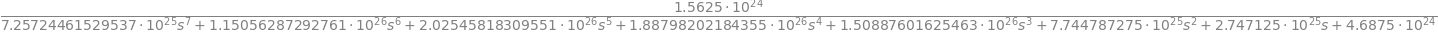

In [42]:
H = u1[v4]
H

In [43]:
num, denom = fraction(H) #returns numerator and denominator

# convert symbolic to numpy polynomial
a = np.array(Poly(num, s).all_coeffs(), dtype=float)
b = np.array(Poly(denom, s).all_coeffs(), dtype=float)
system_c1 = (a, b) # system for circuit 1

In [44]:
x = np.linspace(0.01*2*np.pi, 1*2*np.pi, 10000, endpoint=True)
w_c1, mag_c1, phase_c1 = signal.bode(system_c1, w=x) # returns: rad/s, mag in dB, phase in deg

Plot the results.  
Using

> np.unwrap(2 * phase) / 2) 

to keep the pahse plots the same.

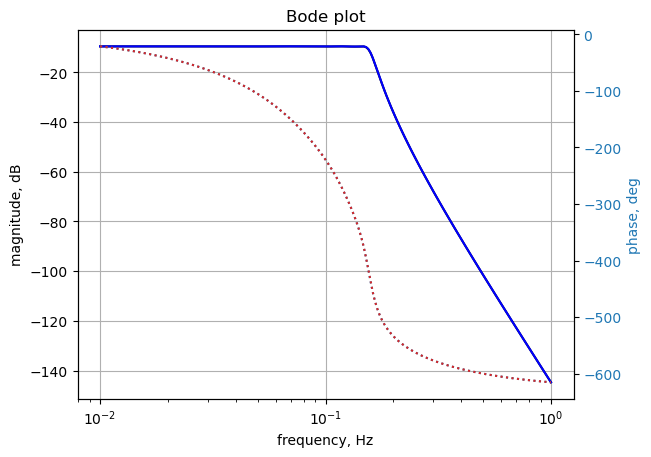

In [45]:
fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(frequency, 20*np.log10(np.abs(voltage)),'-k')    # Bode magnitude plot
plt.semilogx(w_c1/(2*np.pi), mag_c1,'-b')    # Bode magnitude plot

ax1.tick_params(axis='y')
#ax1.set_ylim((-30,20))
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'

#plt.semilogx(frequency, np.angle(voltage)*180/np.pi,':',color=color)  # Bode phase plot
plt.semilogx(frequency, np.unwrap(2*np.angle(voltage)/2) *180/np.pi,':',color=color)  # Bode phase plot
plt.semilogx(w_c1/(2*np.pi), phase_c1,':',color='tab:red')  # Bode phase plot


ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim((-5,25))

plt.title('Bode plot')
plt.show()

The data from python and LTSpice match.